# EXERCISE 1 & 2

In [70]:
# Importing all the necessary libraries/modules

import pandas as pd
import missingno as msno
import sweetviz as sv

from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the data set
diagnosis_dataset = pd.read_csv("dataset.csv")

## Exploratory Data Analysis

In [3]:
diagnosis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [4]:
diagnosis_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [5]:
# Diagnosis column examination

diagnosis_dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We can have a global insight of the diagnosis. Of the total counts, 357 which is about 62.7% are marked as 'B', the rest of the counts, 212 which represents 37.3% are marked as 'M'

In [6]:
# Check if there are no missing values

diagnosis_dataset.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

<AxesSubplot:>

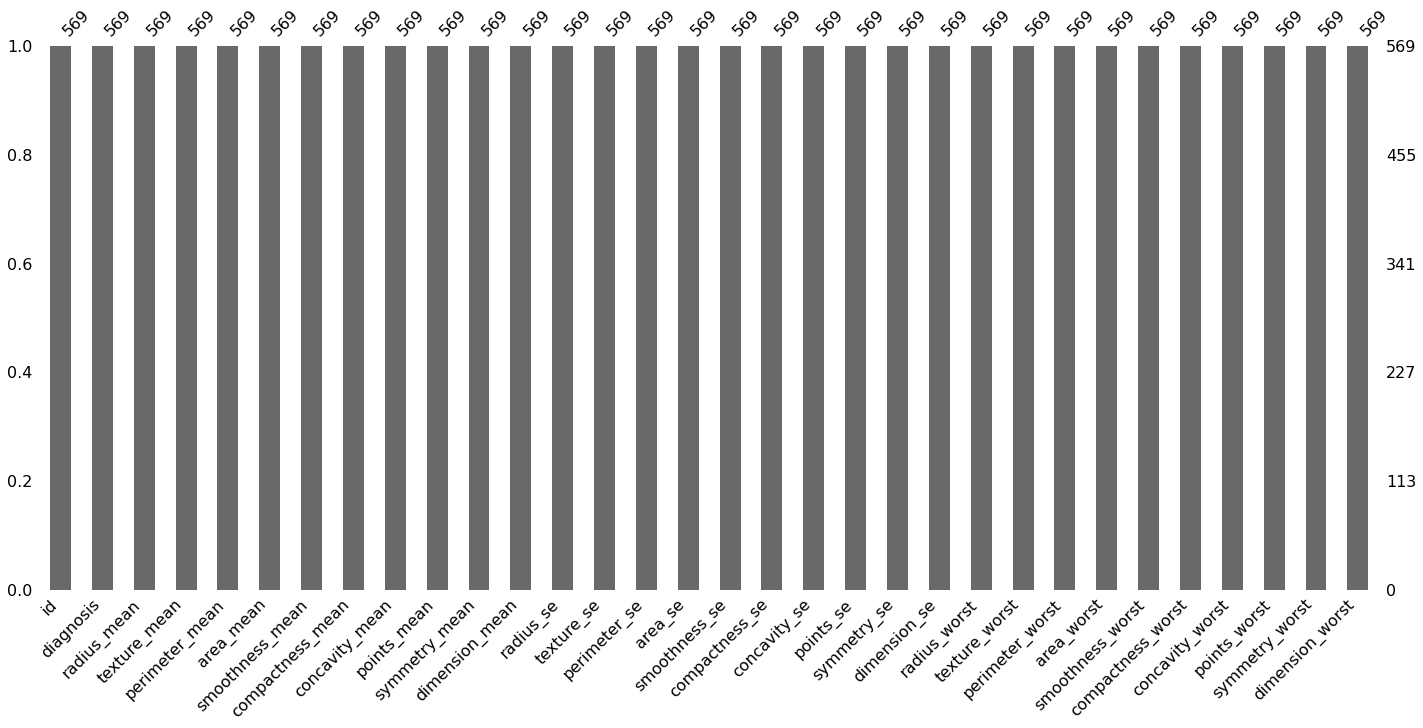

In [7]:
msno.bar(diagnosis_dataset)

With the previous code we can confirm there are no missing values in the data set

In [8]:
# Preprocessing and formatting tasks
A = diagnosis_dataset[['diagnosis']].values

diagnosis = preprocessing.LabelEncoder()
diagnosis.fit(['B', 'M'])
A[:,0] = diagnosis.transform(A[:,0])

In [9]:
# Adding formatted values to the original data set
diagnosis_dataset['diagnosis'] = (A[:,0])

In [10]:
# Dropping unnecessary columns
diagnosis_dataset = diagnosis_dataset.drop(['id'], axis = 1)
diagnosis_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,0,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,1,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,0,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


## Statistical Analysis

In [11]:
# Statistical Data

# Showing a statistical overview of the data set
diagnosis_dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Show the mean values for Benign and Malign diagnosis

mean_data = diagnosis_dataset.groupby('diagnosis', as_index = False).mean()
mean_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [13]:
# Generate a statistical report for the data

cancer_diagnosis_report = sv.analyze(diagnosis_dataset)

In [14]:
cancer_diagnosis_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
# Finding outlier values in three selected features of the data
# First, we set the calculations needed to find Q1, Q3, IQR and lower and upper values

# radius_mean value
Q1_radius_mean = diagnosis_dataset['radius_mean'].quantile(0.25)
Q3_radius_mean = diagnosis_dataset['radius_mean'].quantile(0.75)
IQR_radius_mean = Q3_radius_mean - Q1_radius_mean
lower_radius_mean = Q1_radius_mean - 1.5 * IQR_radius_mean
upper_radius_mean = Q3_radius_mean + 1.5 * IQR_radius_mean

# smoothness_mean value
Q1_smoothness_mean = diagnosis_dataset['smoothness_mean'].quantile(0.25)
Q3_smoothness_mean = diagnosis_dataset['smoothness_mean'].quantile(0.75)
IQR_smoothness_mean = Q3_smoothness_mean - Q1_smoothness_mean
lower_smoothness_mean = Q1_smoothness_mean - 1.5 * IQR_smoothness_mean
upper_smoothness_mean = Q3_smoothness_mean + 1.5 * IQR_smoothness_mean

# symmetry_mean value
Q1_symmetry_mean = diagnosis_dataset['symmetry_mean'].quantile(0.25)
Q3_symmetry_mean = diagnosis_dataset['symmetry_mean'].quantile(0.75)
IQR_symmetry_mean = Q3_symmetry_mean - Q1_symmetry_mean
lower_symmetry_mean = Q1_symmetry_mean - 1.5 * IQR_symmetry_mean
upper_symmetry_mean = Q3_symmetry_mean + 1.5 * IQR_symmetry_mean

print('Lower value for radius_mean: ', lower_radius_mean)
print('Upper value for radius_mean: ', upper_radius_mean)
print('Lower value for smoothness_mean: ', lower_smoothness_mean)
print('Upper value for smoothness_mean: ', upper_smoothness_mean)
print('Lower value for symmetry_mean: ', lower_symmetry_mean)
print('Upper value for symmetry_mean: ', upper_symmetry_mean)

Lower value for radius_mean:  5.579999999999999
Upper value for radius_mean:  21.9
Lower value for smoothness_mean:  0.057975
Upper value for smoothness_mean:  0.133695
Lower value for symmetry_mean:  0.11119999999999995
Upper value for symmetry_mean:  0.24640000000000006


In [16]:
# Now let's check if there are outliers in any of the three selected features

diagnosis_dataset[(diagnosis_dataset['radius_mean'] > upper_radius_mean)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
47,1,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
54,1,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
58,1,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
99,1,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
164,1,23.09,19.83,152.1,1682.0,0.09342,0.1275,0.1676,0.10030,0.1505,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277
165,1,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
219,1,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
275,1,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
294,1,22.01,21.90,147.2,1482.0,0.10630,0.1954,0.2448,0.15010,0.1824,...,27.66,25.80,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574
295,1,24.63,21.60,165.5,1841.0,0.10300,0.2106,0.2310,0.14710,0.1991,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


In [17]:
diagnosis_dataset[(diagnosis_dataset['radius_mean'] < lower_radius_mean)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst


In [18]:
diagnosis_dataset[(diagnosis_dataset['smoothness_mean'] > upper_smoothness_mean)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
42,1,11.420,20.38,77.58,386.1,0.1425,0.2839,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
58,1,24.250,20.20,166.20,1761.0,0.1447,0.2867,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.58030,0.22480,0.3222,0.08009
126,1,13.110,15.56,87.21,530.2,0.1398,0.1765,0.20710,0.09601,0.1925,...,16.31,22.40,106.40,827.2,0.1862,0.4099,0.63760,0.19860,0.3147,0.14050
423,0,9.268,12.87,61.49,248.7,0.1634,0.2239,0.09730,0.05252,0.2378,...,10.28,16.38,69.05,300.2,0.1902,0.3441,0.20990,0.10250,0.3038,0.12520
541,0,9.295,13.90,59.96,257.8,0.1371,0.1225,0.03332,0.02421,0.2197,...,10.57,17.84,67.84,326.6,0.1850,0.2097,0.09996,0.07262,0.3681,0.08982


In [19]:
diagnosis_dataset[(diagnosis_dataset['smoothness_mean'] < lower_smoothness_mean)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
523,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039


In [20]:
diagnosis_dataset[(diagnosis_dataset['symmetry_mean'] > upper_symmetry_mean)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
42,1,11.420,20.38,77.58,386.1,0.1425,0.28390,0.241400,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
58,1,24.250,20.20,166.20,1761.0,0.1447,0.28670,0.426800,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
64,1,15.340,14.26,102.50,704.4,0.1073,0.21350,0.207700,0.09756,0.2521,...,18.07,19.08,125.10,980.9,0.1390,0.59540,0.63050,0.23930,0.4667,0.09946
151,0,9.742,19.12,61.93,289.7,0.1075,0.08333,0.008934,0.01967,0.2538,...,11.21,23.17,71.79,380.9,0.1398,0.13520,0.02085,0.04589,0.3196,0.08009
161,0,11.260,19.96,73.72,394.1,0.0802,0.11810,0.092740,0.05588,0.2595,...,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009
215,0,10.170,14.88,64.55,311.9,0.1134,0.08061,0.010840,0.01290,0.2743,...,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
251,1,15.660,23.20,110.20,773.5,0.1109,0.31140,0.317600,0.13770,0.2495,...,19.85,31.64,143.70,1226.0,0.1504,0.51720,0.61810,0.24620,0.3277,0.10190
328,0,13.000,20.78,83.51,519.4,0.1135,0.07589,0.031360,0.02645,0.2540,...,14.16,24.11,90.82,616.7,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435
419,1,11.800,16.58,78.99,432.0,0.1091,0.17000,0.165900,0.07415,0.2678,...,13.74,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300
420,0,9.731,15.34,63.78,300.2,0.1072,0.15990,0.410800,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.27720,0.82160,0.15710,0.3108,0.12590


In [21]:
diagnosis_dataset[(diagnosis_dataset['symmetry_mean'] < lower_symmetry_mean)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
391,0,11.2,29.37,70.67,386.0,0.07449,0.03558,0.0,0.0,0.106,...,11.92,38.3,75.19,439.6,0.09267,0.05494,0.0,0.0,0.1566,0.05905


## Feature Standarization

In [35]:
# The following standarization process applies only for KNN Algorithm

y = diagnosis_dataset['diagnosis'].astype('int')
X = diagnosis_dataset.drop(['diagnosis'], axis = 1)

cols = X.columns
index = X.index

In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int32

In [37]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [38]:
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [39]:
index

RangeIndex(start=0, stop=569, step=1)

In [40]:
# Applying standarization to the vectors

transformer = RobustScaler().fit(X)
X_std = transformer.transform(X)
X_std = pd.DataFrame(X_std, columns = cols, index = index)

X_std.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.257353,-1.145648,-0.255444,-0.240066,0.366086,-0.348503,-0.214257,0.065189,0.494083,-0.236342,...,-0.254325,-1.130787,-0.258900,-0.241604,0.244898,-0.444502,-0.381893,-0.062403,0.007407,-0.597963
1,-0.678922,0.019538,-0.586243,-0.564845,0.053354,0.337049,0.023037,-0.131868,0.384615,0.400238,...,-0.534602,-0.285880,-0.469363,-0.460172,-0.340136,0.206357,-0.130775,-0.214264,0.174815,-0.202231
2,-0.571078,-0.357016,-0.529554,-0.490894,0.624934,-0.222816,-0.307297,-0.162041,-0.230769,0.220903,...,-0.442907,0.119213,-0.429402,-0.378231,0.190476,-0.331944,-0.447094,-0.265575,0.260741,-0.059651
3,-0.512255,-0.968028,-0.457656,-0.458885,1.084522,0.320250,-0.150188,0.269324,-0.062130,-0.097387,...,-0.527682,-1.115741,-0.511746,-0.443995,0.183673,-0.154768,-0.521647,-0.143257,-1.066667,-0.591659
4,0.446078,-1.000000,0.394400,0.443433,-0.857898,-0.355681,-0.272988,-0.129074,-0.210059,-0.724466,...,0.212803,-1.120370,0.165658,0.233163,-0.636054,-0.199062,-0.337183,-0.188141,-0.496296,-0.600388


## Modeling of KNN

We will generate a KNN model only to compare this initial and standarized model, to the other models generated

In [30]:
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3) # 70% training - 30% test

In [32]:
KNN = KNeighborsClassifier(n_neighbors = 10)
KNN.fit(X_std_train, y_train)
y_predicted_knn = KNN.predict(X_std_test)

In [33]:
# KNN Model Accuracy

print("Accuracy of KNN: ", metrics.accuracy_score(y_test, y_predicted_knn))

Accuracy of KNN:  0.9649122807017544


## Cross Validation

Now we will perform a cross validation process comparing KNN, Decision Trees and Random Forest algorithms

In [47]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators = 50)))

In [99]:
# Train/Test split

X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, y, test_size = 0.3, random_state = 42) # 70% training - 30% test

In [100]:
# Simple Cross Validation

names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(metrics.accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)
    
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.970760
1   DT  0.941520
2   RF  0.959064


In [101]:
# Stratified Cross Validation

strat_k_fold = StratifiedKFold(n_splits = 20)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = strat_k_fold, scoring = 'accuracy').mean()
    names.append(name)
    scores.append(score)
    
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.929926
1   DT  0.933313
2   RF  0.959914


After performing a simple cross validation and a stratified cross validation, we can observe how KNN and Decision Tree accuracy lowers. On the other hand, Random Forest accuracy has a slight increase in its accuracy. Considering this, we will work with Random Forest algorithm to apply hyperparameters and try to improve its accuracy.

## Improving Random Forest

In [124]:
# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # 70% training - 30% test

In [103]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_predicted_rf = rf_model.predict(X_test)

In [104]:
# Random Forest Model Accuracy with default parameters

print("Accuracy of Random Forest: ", metrics.accuracy_score(y_test, y_predicted_rf))

Accuracy of Random Forest:  0.9649122807017544


In the above code, we created a base Random Forest model with default parameters. At this point, we can observe that the accuracy has already increased from 95.99% to 96.5%. Now, we will try to find the optimal values for some of the parameters in order to improve even more the accuracy.

In [115]:
# Create new a rf model
rf_optimum = RandomForestClassifier()

# Create a dictionary of all values we want to test for n_estimators, max_depth and max_leaf_nodes
param_grid = {'n_estimators': np.arange(100, 110), 'max_depth': np.arange(1, 10), 'max_leaf_nodes': np.arange(1, 10)}

# Use gridsearch to test all values for n_estimators, max_depth and max_leaf_nodes
rf_gscv = GridSearchCV(rf_optimum, param_grid, cv=5)

# Fit model to data
rf_gscv.fit(X, y)

C:\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Miniconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Miniconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])})

In [117]:
# Check top performing n_estimators value
rf_gscv.best_params_

{'max_depth': 8, 'max_leaf_nodes': 7, 'n_estimators': 100}

In [118]:
# Check mean score for the top performing value of n_estimators
rf_gscv.best_score_

0.9596180717279925

We now have some optimal values for the parameters. Let's check if these values help us to improve the accuracy of the model

In [125]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 8, max_leaf_nodes = 7)
rf_model.fit(X_train, y_train)
y_predicted_rf = rf_model.predict(X_test)

In [126]:
# Random Forest Model Accuracy with hyperparameter

print("Accuracy of Random Forest: ", metrics.accuracy_score(y_test, y_predicted_rf))

Accuracy of Random Forest:  0.9707602339181286


## Conclusion

With the coding performed in this exercise, we done a quick review and insight to our data. After doing the mandatory EDA and Statistical Analysis, we move on to perform a cross validation between three different algorithms. In a simple cross validation, we can observe that KNN appears to be the best choice for our model. However, after applying a stratified cross validation, we observe that Random Forest is now our best choice. Since it was the only model that kept its accuracy (with little variation between both validations), we choose Random Forest as our model.

First, with the base model and default parameters, we observe that the accuracy was increased even before applying hyperparameters. Then, after finding the most optimal hyperparameters, we review again our model and the accuracy increases again reaching 97.07% which, compared to the accuracy of KNN in the simple cross validation results to have the same accuracy value.